Importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Reading the file `MERGED_DATA.csv` into a dataframe

In [2]:
df = pd.read_csv('MERGED_DATA.csv')

In [3]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,ID,DEVICE_ID,BRAND,MODEL,NETTYPE,OS,OS_TYPE,OS_VENDOR,RELEASE_DATE,START_DATE,END_DATE,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BATTERY_TYPE,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,MULTISIM_MODE,PIXEL_DENSITY
0,0,4397787,35230713,Samsung,Galaxy A12,4G,Android,smartphone,Google,2020-08-19,2024-01-01,2024-07-12,1230,193,616.0,1,1,1,1,1,1,1,1,0,0,6156,2,8,5000.0,Li-ion,8.90,164.0,75.80,touch,dual standby,264.0
1,1,4129638,35306809,Apple,iPhone SE,4G,iOS,smartphone,Apple,2016-03-01,2022-04-01,2023-05-31,2222,425,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,2,1642.0,Li-ion,7.60,123.8,58.60,touch,Standby,326.0
2,2,1154183,86887805,OnePlus,Nord N100,4G,Android,smartphone,Google,2020-05-21,2021-11-01,2024-07-12,529,984,564.8,1,1,1,1,1,1,1,1,0,0,6156,2,8,5000.0,Li-polymer,8.50,164.9,75.10,touch,dual standby,269.0
3,3,670331,86296505,Xiaomi,Redmi 9T,4G,Android,smartphone,Google,2021-01-01,2021-05-01,2024-02-29,120,1034,624.8,1,1,1,1,1,1,0,1,0,0,4096,2,8,6000.0,Li-polymer,9.60,162.3,77.28,touch,Standby,395.0
4,4,3074468,35639208,Samsung,Galaxy J7 2017 Dual,4G,Android,smartphone,Google,2017-07-01,2021-10-01,2021-10-31,1553,30,653.4,1,1,1,1,1,1,1,1,0,0,3072,2,8,3600.0,Li-ion,7.80,152.4,74.70,touch,Standby,401.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354469,12354469,327793,86324003,Lenovo,A1000 Dual,3G,Android,smartphone,Google,2015-09-01,2019-07-01,2019-07-31,1399,30,521.0,0,0,1,1,1,1,0,1,0,0,1024,2,4,2000.0,Li-ion,10.60,124.5,64.00,touch,Standby,233.0
12354470,12354470,2738649,35480111,Samsung,Galaxy A01 Dual Global,4G,Android,smartphone,Google,2020-02-01,2020-09-01,2021-11-30,213,455,607.9,1,1,1,1,1,1,1,1,0,0,2048,2,8,3000.0,Li-ion,8.30,146.3,70.90,touch,dual standby,301.0
12354471,12354471,1052312,86597302,Alcatel,One Touch Pop C7 Dual,3G,Android,smartphone,Google,2014-04-01,2015-08-01,2015-09-30,487,60,554.9,0,0,1,1,1,1,0,1,0,0,512,2,4,1900.0,Li-ion,9.90,141.0,71.80,touch,Standby,196.0
12354472,12354472,4195159,35734105,LG,Optimus L3,3G,Android,smartphone,Google,2011-12-20,2017-03-01,2019-02-28,1898,729,468.3,0,0,1,1,1,1,0,0,0,0,384,1,1,1540.0,Li-ion,11.85,102.6,61.60,touch,Standby,125.0


Computing the correlation matrix for selected features, and visualizing it as a heatmap.

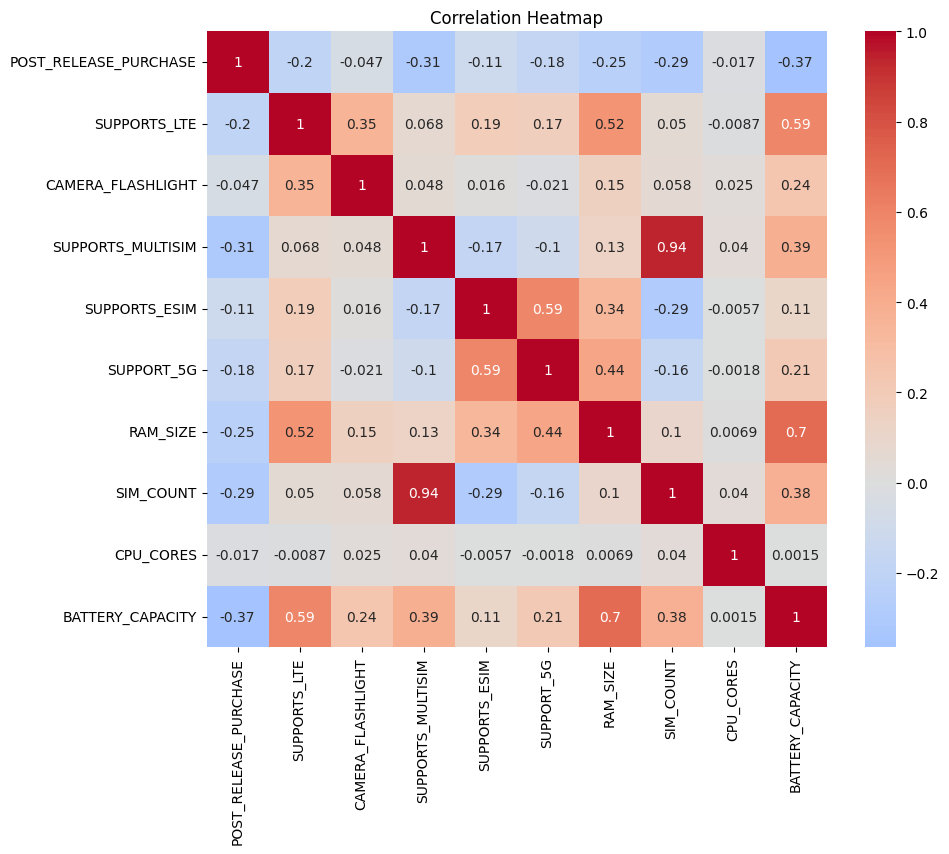

In [14]:
correlation_matrix = df[['POST_RELEASE_PURCHASE', 'SUPPORTS_LTE',
       'CAMERA_FLASHLIGHT', 'SUPPORTS_MULTISIM', 'SUPPORTS_ESIM', 'SUPPORT_5G',
       'RAM_SIZE', 'SIM_COUNT', 'CPU_CORES', 'BATTERY_CAPACITY',
   ]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Calculate the average `POST_RELEASE_PURCHASE` purchase period for each `BRAND`.

In [4]:
brand_post_release = df.groupby('BRAND').agg({
    'POST_RELEASE_PURCHASE': 'mean'
}).reset_index()

Counting the number of devices for each `BRAND` and renameing the resulting column to `COUNTS`.

In [5]:
brand_device_id = df.groupby('BRAND').agg({
    'DEVICE_ID': 'count'
}).reset_index().rename(columns={'DEVICE_ID': 'COUNTS'})

Sorting values by descending order using `COUNTS` and `POST_RELEASE_PURCHASE`

In [6]:
brand_device_top15 = brand_device_id.sort_values('COUNTS',ascending=False).head(15)

In [7]:
brand_post_days_top15 = brand_post_release.sort_values('POST_RELEASE_PURCHASE', ascending=False)

Mergeing `brand_device_top15` and `brand_post_days_top15` on `BRAND` with an **inner join**.

In [8]:
merged_df = pd.merge(brand_device_top15, brand_post_days_top15, on='BRAND', how='inner')
merged_df['POST_RELEASE_PURCHASE'] = merged_df['POST_RELEASE_PURCHASE'].astype(int)

In [9]:
merged_df

,BRAND,COUNTS,POST_RELEASE_PURCHASE
0,Samsung,4935522,949
1,Apple,2610699,1308
2,Xiaomi,1007910,649
3,Nokia,500995,1687
4,Alcatel,495699,897
5,Huawei,466542,941
6,Fly,225956,886
7,Lenovo,222061,950
8,HTC,162195,1170
9,LG,161029,1103


Generatinge a bar chart displaying the average `POST_RELEASE_PURCHASE` for each `BRAND`.

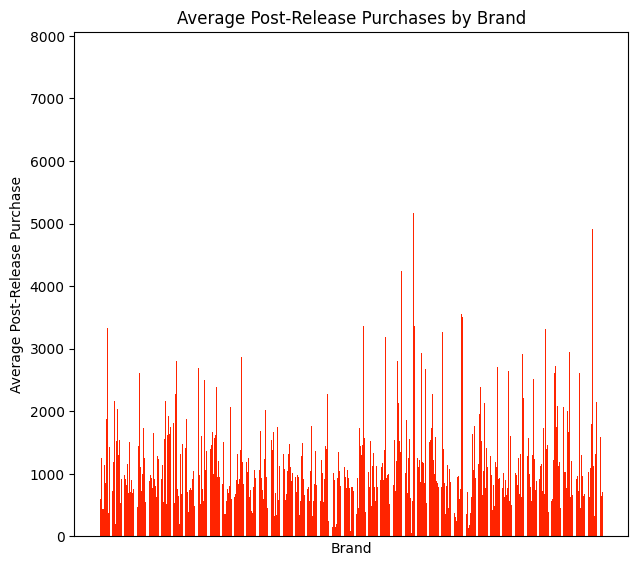

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(brand_post_release['BRAND'], brand_post_release['POST_RELEASE_PURCHASE'], color='#FF2400')

plt.xlabel('Brand')
plt.ylabel('Average Post-Release Purchase')
plt.title('Average Post-Release Purchases by Brand')
plt.tight_layout()
plt.xticks([])  

plt.show()

In [15]:
df.head()

,Unnamed: 0,ID,DEVICE_ID,BRAND,MODEL,NETTYPE,OS,OS_TYPE,OS_VENDOR,RELEASE_DATE,START_DATE,END_DATE,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BATTERY_TYPE,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,MULTISIM_MODE,PIXEL_DENSITY
0,0,4397787,35230713,Samsung,Galaxy A12,4G,Android,smartphone,Google,2020-08-19,2024-01-01,2024-07-12,1230,193,616.0,1,1,1,1,1,1,1,1,0,0,6156,2,8,5000.0,Li-ion,8.9,164.0,75.80,touch,dual standby,264.0
1,1,4129638,35306809,Apple,iPhone SE,4G,iOS,smartphone,Apple,2016-03-01,2022-04-01,2023-05-31,2222,425,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,2,1642.0,Li-ion,7.6,123.8,58.60,touch,Standby,326.0
2,2,1154183,86887805,OnePlus,Nord N100,4G,Android,smartphone,Google,2020-05-21,2021-11-01,2024-07-12,529,984,564.8,1,1,1,1,1,1,1,1,0,0,6156,2,8,5000.0,Li-polymer,8.5,164.9,75.10,touch,dual standby,269.0
3,3,670331,86296505,Xiaomi,Redmi 9T,4G,Android,smartphone,Google,2021-01-01,2021-05-01,2024-02-29,120,1034,624.8,1,1,1,1,1,1,0,1,0,0,4096,2,8,6000.0,Li-polymer,9.6,162.3,77.28,touch,Standby,395.0
4,4,3074468,35639208,Samsung,Galaxy J7 2017 Dual,4G,Android,smartphone,Google,2017-07-01,2021-10-01,2021-10-31,1553,30,653.4,1,1,1,1,1,1,1,1,0,0,3072,2,8,3600.0,Li-ion,7.8,152.4,74.70,touch,Standby,401.0


Filtering the DataFrame to include only rows where the `BRAND` is `Apple`.

In [16]:
apple_df = df[df['BRAND'] == 'Apple']

Aggregating `apple_df` by `MODEL` to calculate the average `POST_RELEASE_PURCHASE` and the earliest `RELEASE_DATE`.

In [29]:
apple_purchases = apple_df.groupby('MODEL').agg({
    'POST_RELEASE_PURCHASE' : 'mean',
    'RELEASE_DATE': 'min'
}).rename(columns={'POST_RELEASE_PURCHASE': 'POST_RELEASE_PURCHASE_AVG'})

apple_purchases['POST_RELEASE_PURCHASE_AVG'] = apple_purchases['POST_RELEASE_PURCHASE_AVG'].astype(int)
apple_purchases = apple_purchases.sort_values('POST_RELEASE_PURCHASE_AVG', ascending=False)

In [30]:
apple_purchases

,POST_RELEASE_PURCHASE_AVG,RELEASE_DATE
MODEL,,
iPhone,2702,2007-07-01
iPhone 3G,2401,2008-05-08
iPhone 4,2252,2010-06-01
iPhone 3GS,2144,2009-04-15
iPhone 4S,1910,2011-08-18
iPhone 5 CDMA2000,1799,2012-07-01
iPhone 5,1675,2012-08-16
iPhone 5S,1641,2013-09-01
iPhone 6,1608,2014-07-01


Aggregating the dataframe by `ID` to find the earliest `START_DATE` and the latest `END_DATE`.

In [31]:
aggregated_df = df.groupby('ID').agg({
    'START_DATE': 'min',
    'END_DATE': 'max'
}).reset_index()

Aggregating the dataframe by `ID` to count the number of `DEVICE_ID`s per `ID`, renaming the count column to `NUMBER_OF_DEVICES`.


In [43]:
devicecount_df = df.groupby('ID').agg({
    'DEVICE_ID': 'count'
}).reset_index().rename(columns={'DEVICE_ID': 'NUMBER_OF_DEVICES'})


Converting `START_DATE` and `END_DATE` to datetime, then calculate `CUSTOMER_LIFETIME` as the day difference.


In [39]:
aggregated_df['START_DATE'] = pd.to_datetime(aggregated_df['START_DATE'])
aggregated_df['END_DATE']  = pd.to_datetime(aggregated_df['END_DATE'])
aggregated_df['CUSTOMER_LIFETIME'] = (aggregated_df['END_DATE'] - aggregated_df['START_DATE']).dt.days

aggregated_df

,ID,START_DATE,END_DATE,CUSTOMER_LIFETIME
0,1,2016-03-01,2019-10-31,1339
1,2,2017-01-01,2024-07-12,2749
2,5,2021-11-01,2024-07-12,984
3,6,2015-10-01,2024-07-12,3207
4,7,2018-01-01,2024-07-12,2384
...,...,...,...,...
2974494,6400384,2013-10-01,2013-11-30,60
2974495,6400401,2017-04-01,2024-07-12,2659
2974496,6400404,2013-10-01,2014-11-30,425
2974497,6400410,2015-07-01,2024-07-12,3299


Mergeing `aggregated_df` and `devicecount_df` on `ID`, then computing `AVG_DAYS` as the average number of days per device.


In [50]:
merged_df = pd.merge(aggregated_df, devicecount_df, on='ID')
merged_df['AVG_DAYS'] = (merged_df['CUSTOMER_LIFETIME'] / merged_df['NUMBER_OF_DEVICES']).astype(int)
merged_df

,ID,START_DATE,END_DATE,CUSTOMER_LIFETIME,NUMBER_OF_DEVICES,AVG_DAYS
0,1,2016-03-01,2019-10-31,1339,2,669
1,2,2017-01-01,2024-07-12,2749,10,274
2,5,2021-11-01,2024-07-12,984,3,328
3,6,2015-10-01,2024-07-12,3207,3,1069
4,7,2018-01-01,2024-07-12,2384,4,596
...,...,...,...,...,...,...
2974494,6400384,2013-10-01,2013-11-30,60,1,60
2974495,6400401,2017-04-01,2024-07-12,2659,1,2659
2974496,6400404,2013-10-01,2014-11-30,425,1,425
2974497,6400410,2015-07-01,2024-07-12,3299,1,3299


Examining potential correlations between `DAYS_USED`, `RAM_SIZE`, and `BATTERY_CAPACITY`.

                  RAM_SIZE  BATTERY_CAPACITY  DAYS_USED
RAM_SIZE          1.000000          0.701867   0.007711
BATTERY_CAPACITY  0.701867          1.000000   0.018856
DAYS_USED         0.007711          0.018856   1.000000


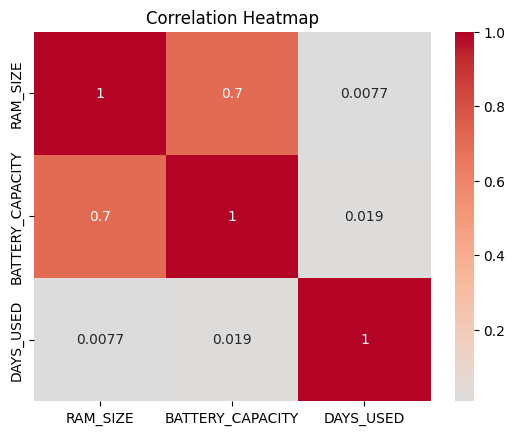

In [51]:
correlation_matrix = df[['RAM_SIZE', 'BATTERY_CAPACITY', 'DAYS_USED']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()